In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

%matplotlib inline

In [129]:
# Make a blank, empty data frame
df = pd.DataFrame()

df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]
df

,age
0,28
1,42
2,27
3,24
4,35
5,54
6,35
7,37


In [130]:
# Using built-in python functionality
mean_age = sum(df.age)/len(df.age)
print(mean_age)

# Using numpy functionality
# is df['age'] better than df.age or are they identical?
mean_age_np = np.mean(df['age'])
print(mean_age_np)

35.25
35.25


In [131]:
# Vanilla python apparently = modules that come built into it
print('This is with vanilla python (statistics module): {}.'.format(stats.median(df['age'])))

# Or! Use np again
print('This is with numpy: {}.'.format(np.median(df['age'])))

This is with vanilla python (statistics module): 35.0.
This is with numpy: 35.0.


In [132]:
# Now to the mode
#stats.mode(df['age'])

# But what if there are multiple modes? Here's one way to get one of the multiple modes without an error being raised
# First, generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['age'], return_counts=True)

# Fudging with counts a bit
counts[0] = 2
print('Values: {}. Counts: {}'.format(values, counts))

# Find the first index of the largest count
max_ind = np.argmax(counts)

print(max_ind)
print(values[max_ind])

#temp_dat = df
#temp_dat.loc[len(temp_dat+1)]=24
# But! What if we have multiple modes and want all of them:
# Maybe I'll come back to this

def find_mode(data, column):
    curr_dat = data[str(column)]
    (values, counts)=np.unique(curr_dat, return_counts=True)
    max_ind=np.argmax(counts)
    out_array=[]
    for count in counts:
        if count == counts[max_ind]:
            out_array.append(count)
    return out_array
    #return pd.DataFrame({'Values':out_array})

test = find_mode(df, 'age')
        
print('this is test: {}'.format(test))

Values: [24 27 28 35 37 42 54]. Counts: [2 1 1 2 1 1 1]
0
24
this is test: [2]


In [133]:
### Going on now to look at variance
mean = np.mean(df['age'])
age_var = sum((df['age']-mean)**2)/(len(df['age'])-1)
print('Mean: {}, Var: {}'.format(mean, age_var))

# Or we can use:
# Getting the wrong values for the np version...
    # Needed to add the delta degrees of freedom parameter
print(np.var(df.age.values, ddof=1))
print(df.age.var())

# Also sd using numpy/pandas
print(np.std(df.age.values, ddof=1))
print(df.age.var()**0.5)

Mean: 35.25, Var: 92.5
92.5
92.5
9.617692030835672
9.617692030835672


In [134]:
### Next, standard error or "margin of error" when speaking of poll results
stand_dev = age_var**0.5
standard_error = stand_dev/len(df['age'])**0.5
print(standard_error)

# Good ole numpy dtuff
print(np.std(df['age'] ,ddof=1) / np.sqrt(len(df['age'])))

3.4003676271838605
3.4003676271838605


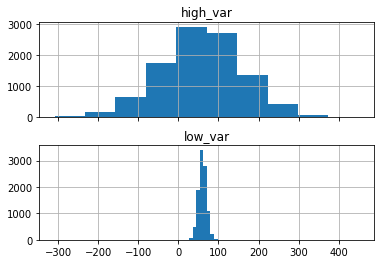

low_var     106.497888
high_var    450.257562
dtype: float64
low_var      17.960725
high_var   -308.953973
dtype: float64


In [135]:
# First, create an empty dataframe to store your variables-to-be.
pop=pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables. Notice that it's using native panda method .hist
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print(pop.max())
print(pop.min())

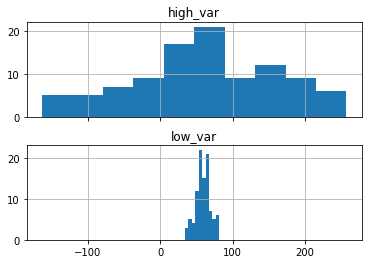

low_var     10.423123
high_var    97.442522
dtype: float64

In [136]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var']=np.random.choice(pop['high_var'], 100)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist(layout=(2,1), sharex=True)
plt.show()

# Check how well the sample replicates the population.
sample.mean()
sample.std(ddof=1)

In [137]:
## Moving onto "Describing Data with Pandas"

# Set up the data
data = pd.DataFrame()
data['gender'] = ['male']*100 + ['female']*100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

data.head()

,gender,height,weight
0,male,64.884860,210.301581
1,male,60.753479,210.066311
2,male,65.666184,174.397761
3,male,72.423857,170.547659
4,male,76.548191,149.306576


In [148]:
# Here are some neat native panda methods for quickly describing data
print(data.height.mean())
print(data.weight.mean())

# Look at this!
data.describe()

# And this!
data.groupby('gender').describe()

66.6048337540163
179.2112925304462


height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  64.434423  5.135701  53.771742  60.573765  64.111599   
male    100.0  68.775244  7.615814  51.054894  62.873433  68.922686   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  68.055731  77.382896  100.0  163.638932  14.031586  127.180479   
male    74.339773  86.633752  100.0  194.783653  23.488917  143.543944   

                                                        
               25%         50%         75%         max  
gender                                                  
female  153.415995  163.880397  172.238615  195.003549  
male    178.540459  195.564164  208.855317  252.766431

In [160]:
### Buuuut what if we're looking at string data?
print(data.gender.value_counts())

# Don't do it with floats (or ints, numeric in general) like weight because they're all unique
print(len(data.weight.value_counts()))

female    100
male      100
Name: gender, dtype: int64
200


Mean: 10.166666666666666
Median: 10.5
Mode: 0     6
1     8
2    10
3    11
4    12
5    14
dtype: int64
Variance: 8.166666666666668
STD: 2.8577380332470415
Standard Error: 1.166666666666667


Mean: 9.714285714285714
Median: 10.0
Mode: 0     6.0
1     7.0
2     8.0
3    10.0
4    11.0
5    12.0
6    14.0
dtype: float64
Variance: 8.238095238095237
STD: 2.8702082220799308
Standard Error: 1.084836738085192


In [233]:
### What would happen if Oliver(?) was replaced by 1-year-old Jessica, who is then included here
brady_kids.loc['Jessica', 'age']=1



print('Mean: {}'.format(brady_kids.age.mean()))
# Did change

print('Median: {}'.format(brady_kids.age.median()))
# Did change. Would use this now en leiu of mean

print('Mode: {}'.format(brady_kids.age.mode()))
# There is no mode. Did not change

print('Variance: {}'.format(brady_kids.age.var()))
# Did change

print('STD: {}'.format(brady_kids.age.std()))
# Did change

print('Standard Error: {}'.format(brady_kids.age.std()/(len(brady_kids)**0.5)))
# Did change

# I would certainly still choose the std for the same reasons but the median is now a more interesting measure of central tendency given the outlier

Mean: 8.857142857142858
Median: 10.0
Mode: 0     1.0
1     6.0
2     8.0
3    10.0
4    11.0
5    12.0
6    14.0
dtype: float64
Variance: 18.80952380952381
STD: 4.3369947901195145
Standard Error: 1.6392299502912862


array(['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Jessica'],
      dtype=object)

In [240]:
# The last question is unanswerable given the information given but I guess we can assume each is a compeltely independent substample of the population and therefore we can just average the responses

brady_reviews = pd.DataFrame(index=['TV Guide', 'Entertainment Weekly', 'Pop Culture Today', 'SciPhi Phanatic'])
brady_reviews['sample_perc']=[.2, .23, .17, .05]
brady_reviews.sample_perc.describe()
brady_reviews_SEM = brady_reviews.sample_perc.std()/np.sqrt(len(brady_reviews))
print(brady_reviews_SEM)
# I would guess 16 +- 4%

0.03944933459514875
